### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)

In [3]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
Application_type_counts = application_df.APPLICATION_TYPE.value_counts()
Application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

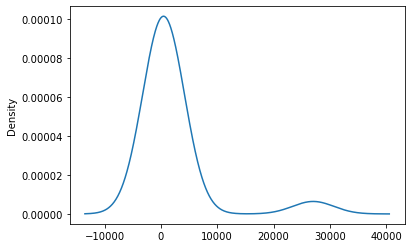

In [6]:
# Visualize the value counts of APPLICATION_TYPE
Application_type_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(Application_type_counts[Application_type_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C5200        1
C3700        1
C1732        1
C2150        1
C2380        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C1720        6
C2400        6
C4100        6
C1600        5
C1257        5
C0           3
C2710        3
C1260        3
C3200        2
C1256        2
C1267        2
C1246        2
C1234        2
C2190        1
C1728        1
C1248        1
C1283        1
C2500        1
C8210        1
C1245        1
C1570        1
C4200        1
C1820        1
C2600        1
C2561        1
C1370        1
C4500        1
C1580        1
C4120        1
C1236        1
C2170        1
C6100        1
C1900        1
C2570        1
C5200     

<AxesSubplot:ylabel='Density'>

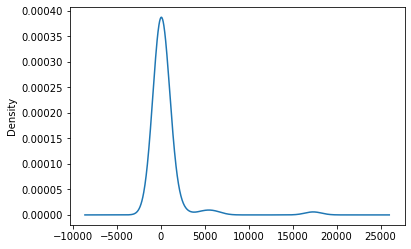

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          10
AFFILIATION                6
CLASSIFICATION             8
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

In [14]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(application_df.columns)

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-2499

In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL",], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layers1 = 24
hidden_nodes_layers2 = 12
nn = tf.keras.models.Sequential()

#First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layers1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, activation="relu"))

#Output later
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1128      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=40,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/40
 83/804 [==>...........................] - ETA: 0s - loss: 0.7188 - accuracy: 0.5859  
Epoch 00001: saving model to checkpoints\weights.01.hdf5
120/804 [===>..........................] - ETA: 0s - loss: 0.7046 - accuracy: 0.5954
Epoch 00001: saving model to checkpoints\weights.01.hdf5
273/804 [=========>....................] - ETA: 0s - loss: 0.6693 - accuracy: 0.6294
Epoch 00001: saving model to checkpoints\weights.01.hdf5
380/804 [=============>................] - ETA: 0s - loss: 0.6540 - accuracy: 0.6450
Epoch 00001: saving model to checkpoints\weights.01.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.6475 - accuracy: 0.6515
Epoch 00001: saving model to checkpoints\weights.01.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6351 - accuracy: 0.6638
Epoch 00001: saving model to checkpoints\weights.01.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6307 - accuracy: 0.6679
Epoch 00001: saving model to checkpoints\weights.0

544/804 [===================>..........] - ETA: 0s - loss: 0.5440 - accuracy: 0.7372
Epoch 00007: saving model to checkpoints\weights.07.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7365
Epoch 00007: saving model to checkpoints\weights.07.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5448 - accuracy: 0.7363
Epoch 00007: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 1s 802us/step - loss: 0.5451 - accuracy: 0.7359
Epoch 8/40
  1/804 [..............................] - ETA: 0s - loss: 0.6086 - accuracy: 0.7188
Epoch 00008: saving model to checkpoints\weights.08.hdf5
155/804 [====>.........................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7508
Epoch 00008: saving model to checkpoints\weights.08.hdf5
218/804 [=======>......................] - ETA: 0s - loss: 0.5345 - accuracy: 0.7503
Epoch 00008: saving model to checkpoints\weights.08.hdf5
356/804 [============>.................] - ETA

178/804 [=====>........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.7307
Epoch 00014: saving model to checkpoints\weights.14.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.5467 - accuracy: 0.7338
Epoch 00014: saving model to checkpoints\weights.14.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5461 - accuracy: 0.7345
Epoch 00014: saving model to checkpoints\weights.14.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5454 - accuracy: 0.7353
Epoch 00014: saving model to checkpoints\weights.14.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5452 - accuracy: 0.7355
Epoch 00014: saving model to checkpoints\weights.14.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5450 - accuracy: 0.7356
Epoch 00014: saving model to checkpoints\weights.14.hdf5
804/804 [==============================] - 1s 765us/step - loss: 0.5447 - accuracy: 0.7357
Epoch 15/40
  1/804 [..............................] - ET

688/804 [========================>.....] - ETA: 0s - loss: 0.5418 - accuracy: 0.7329
Epoch 00020: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 1s 741us/step - loss: 0.5419 - accuracy: 0.7331
Epoch 21/40
  1/804 [..............................] - ETA: 0s - loss: 0.6104 - accuracy: 0.6562
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 66/804 [=>............................] - ETA: 0s - loss: 0.5445 - accuracy: 0.7316
Epoch 00021: saving model to checkpoints\weights.21.hdf5
219/804 [=======>......................] - ETA: 0s - loss: 0.5479 - accuracy: 0.7297
Epoch 00021: saving model to checkpoints\weights.21.hdf5
281/804 [=========>....................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7305
Epoch 00021: saving model to checkpoints\weights.21.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 0.5469 - accuracy: 0.7318
Epoch 00021: saving model to checkpoints\weights.21.hdf5
479/804 [================>.............] - ET

378/804 [=============>................] - ETA: 0s - loss: 0.5416 - accuracy: 0.7332
Epoch 00027: saving model to checkpoints\weights.27.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.5415 - accuracy: 0.7333
Epoch 00027: saving model to checkpoints\weights.27.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7339
Epoch 00027: saving model to checkpoints\weights.27.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5413 - accuracy: 0.7340
Epoch 00027: saving model to checkpoints\weights.27.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5413 - accuracy: 0.7341
Epoch 00027: saving model to checkpoints\weights.27.hdf5
804/804 [==============================] - 1s 759us/step - loss: 0.5413 - accuracy: 0.7342
Epoch 28/40
 75/804 [=>............................] - ETA: 0s - loss: 0.5582 - accuracy: 0.7241
Epoch 00028: saving model to checkpoints\weights.28.hdf5
138/804 [====>.........................] - ET

804/804 [==============================] - 1s 733us/step - loss: 0.5449 - accuracy: 0.7339
Epoch 34/40
  1/804 [..............................] - ETA: 0s - loss: 0.6069 - accuracy: 0.6562
Epoch 00034: saving model to checkpoints\weights.34.hdf5
147/804 [====>.........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7375
Epoch 00034: saving model to checkpoints\weights.34.hdf5
207/804 [======>.......................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7371
Epoch 00034: saving model to checkpoints\weights.34.hdf5
350/804 [============>.................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7369
Epoch 00034: saving model to checkpoints\weights.34.hdf5
413/804 [==============>...............] - ETA: 0s - loss: 0.5415 - accuracy: 0.7366
Epoch 00034: saving model to checkpoints\weights.34.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5410 - accuracy: 0.7368
Epoch 00034: saving model to checkpoints\weights.34.hdf5
608/804 [=====================>........] - ET

508/804 [=================>............] - ETA: 0s - loss: 0.5438 - accuracy: 0.7357
Epoch 00040: saving model to checkpoints\weights.40.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5430 - accuracy: 0.7359
Epoch 00040: saving model to checkpoints\weights.40.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5424 - accuracy: 0.7363
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 868us/step - loss: 0.5421 - accuracy: 0.7364
268/268 - 0s - loss: 0.5539 - accuracy: 0.7251
Loss: 0.5538926720619202, Accuracy: 0.7251312136650085


<AxesSubplot:>

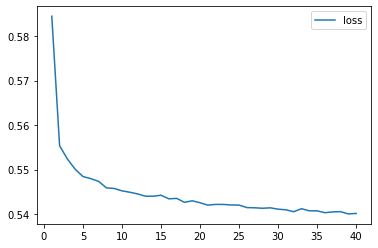

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

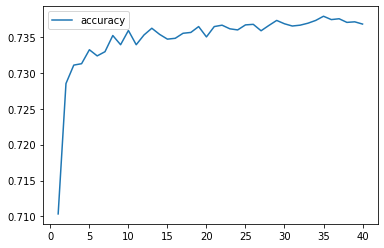

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [24]:
nn.save("AlphabetSoupCharity.h5")

In [25]:
# Import the model to a new object 
nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5539 - accuracy: 0.7251
Loss: 0.5538926720619202, Accuracy: 0.7251312136650085
